In [1]:
import sys
import os
# Pretend we are running from the root directory
sys.path.append("..")

from dataloaders.dataset_configuration import get_trans10k_train_loader, get_trans10k_test_loader, get_trans10k_val_loader
from utils.utils import load_prompt_embeds

/home/xycoord/Code/Transparency_Estimation/Transparency-Estimation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T

def show_tensor_images(tensor, num_images=None, title=None):
    """Display a grid of images from a tensor of shape (batch, channels, height, width)
    
    Args:
        tensor (torch.Tensor): Image tensor with shape (B,C,H,W)
        num_images (int): Maximum number of images to display
        title (str, optional): Title for the plot
    """
    # Make sure it's on CPU and detached from grad
    tensor = tensor.cpu().detach()
    if num_images is None:
        num_images = tensor.shape[0]
    
    # Take first num_images from batch
    tensor = tensor[:num_images]
    
    # Create a grid of images
    if tensor.shape[1] == 3:  # RGB images
        # Normalize to [0,1] range if needed
        if tensor.max() > 1:
            tensor = tensor / 255
        
        # Convert from (B,C,H,W) to (B,H,W,C) for displaying
        imgs = tensor.permute(0, 2, 3, 1)
        
    elif tensor.shape[1] == 1:  # Grayscale images
        # Remove the channel dimension and repeat to make RGB
        imgs = tensor.squeeze(1).unsqueeze(-1).repeat(1, 1, 1, 3)
    
    # Create subplot grid
    rows = (num_images + 3) // 4  # Round up division
    fig, axs = plt.subplots(rows, 4, figsize=(15, 3*rows))
    axs = axs.flatten()
    
    # Plot each image
    for img, ax in zip(imgs, axs):
        ax.imshow(img)
        ax.axis('off')
    
    # Hide empty subplots
    for ax in axs[len(imgs):]:
        ax.axis('off')
    
    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [3]:
device = 'cuda'
dataset_name = 'trans10k'
dataset_path = '/home/xycoord/models/Trans10k/'
train_batch_size = 4
dataloader_num_workers = 4

In [4]:
train_loader = get_trans10k_train_loader(dataset_path, batch_size=train_batch_size)
val_loader = get_trans10k_val_loader(dataset_path, difficulty='easy')
test_loader = get_trans10k_test_loader(dataset_path, difficulty='hard')

/home/xycoord/Code/Transparency_Estimation/Transparency-Estimation/.venv/lib/python3.10/site-packages/albumentations/core/validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [5]:
def check_loader(loader):
    print("Loader Length: ", len(loader))
    for step, batch in enumerate(loader):

        images, masks, images_aug, masks_aug, names  = batch
        masks = masks.unsqueeze(1).repeat(1,3,1,1)
        masks_aug = masks_aug.unsqueeze(1).repeat(1,3,1,1)
        
        print("Image Data Shape: ", images.shape)
        print("Image Data Type:", images.dtype)
        print("Mask Shape: ", masks.shape)
        print("Mask Data Type:", masks.dtype)
        print("Names: ", names)
        
        show_tensor_images(images)
        show_tensor_images(masks)
        show_tensor_images(images_aug)
        show_tensor_images(masks_aug)
        

        break

Loader Length:  1250
Image Data Shape:  torch.Size([4, 3, 1024, 1024])
Image Data Type: torch.float32
Mask Shape:  torch.Size([4, 3, 1024, 1024])
Mask Data Type: torch.float32
Names:  ['1353.jpg', '6129.jpg', '6801.jpg', '6626.jpg']


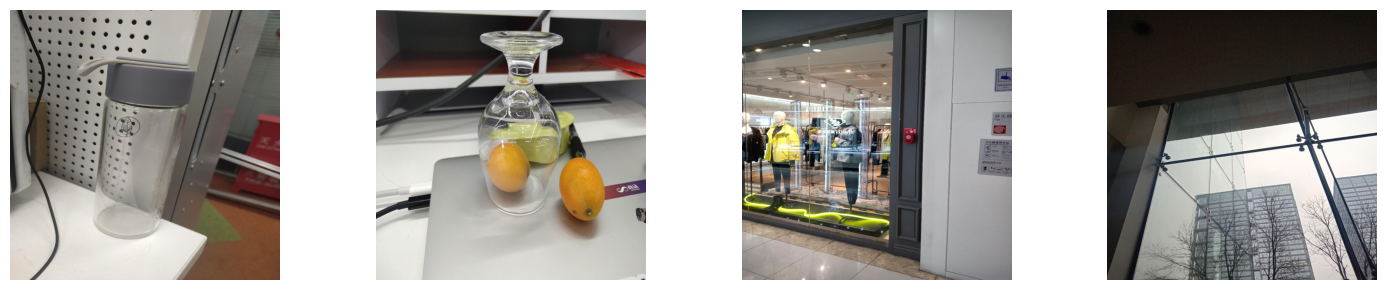

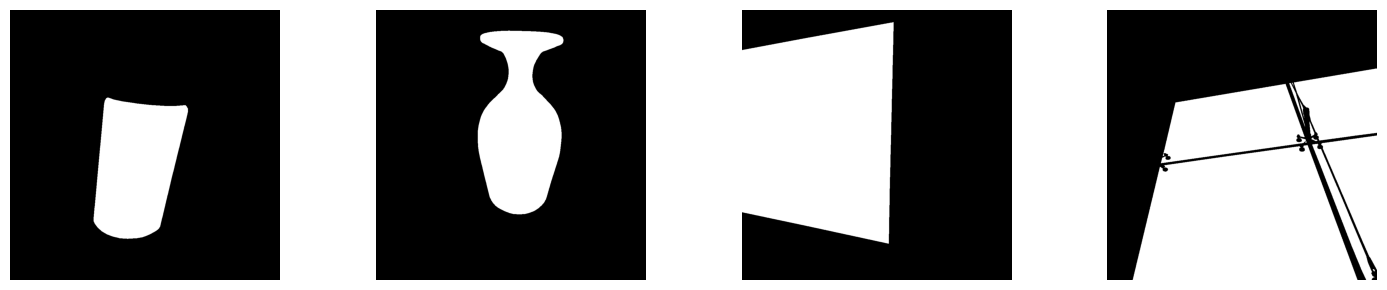

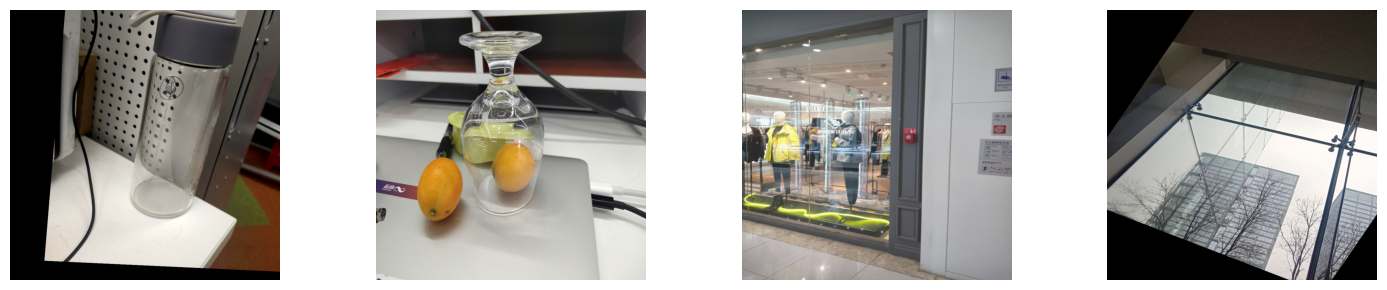

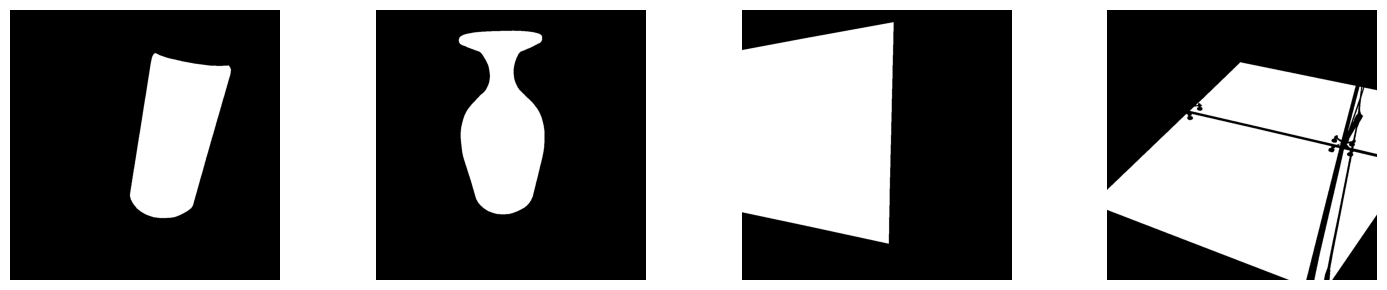

In [6]:
check_loader(train_loader)

Loader Length:  1000
Image Data Shape:  torch.Size([1, 3, 1024, 1024])
Image Data Type: torch.float32
Mask Shape:  torch.Size([1, 3, 1024, 1024])
Mask Data Type: torch.float32
Names:  ['8969.jpg']


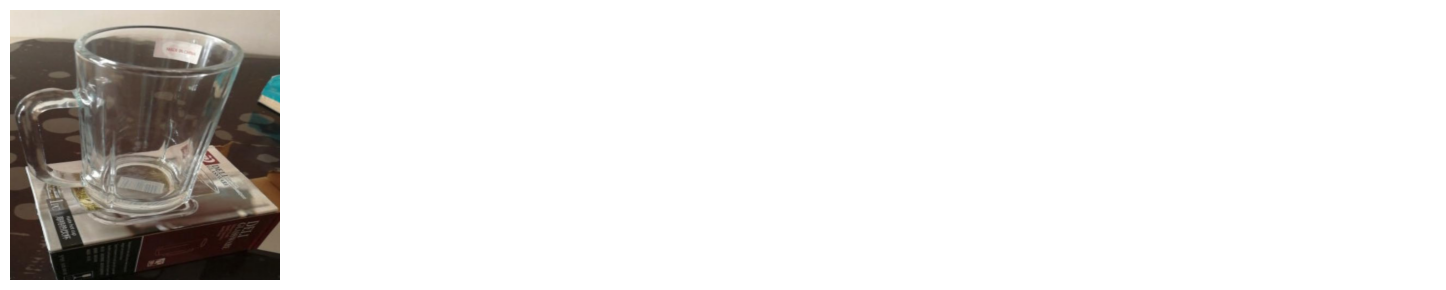

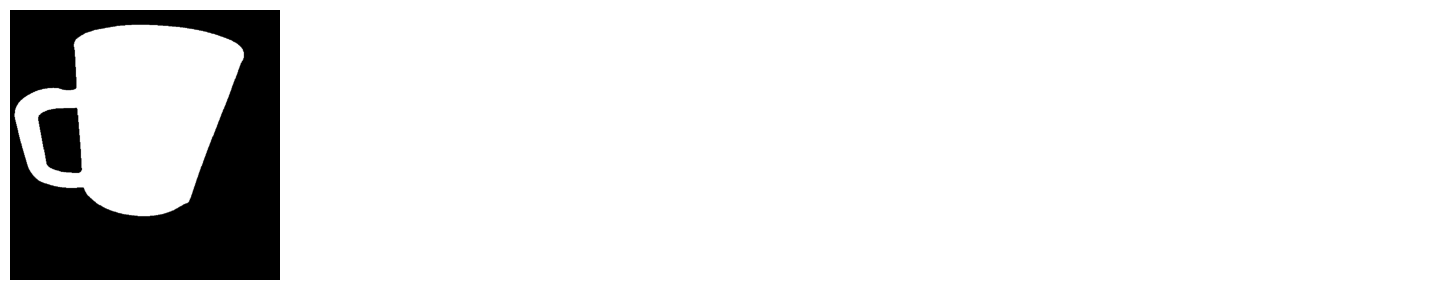

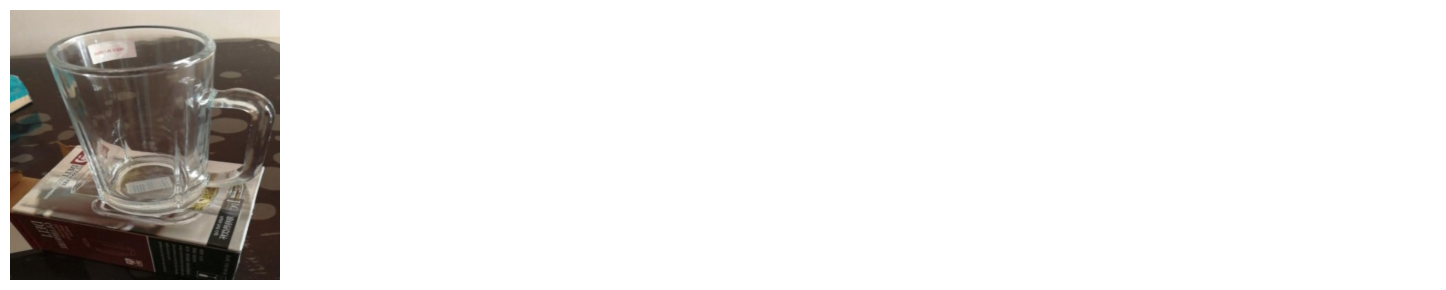

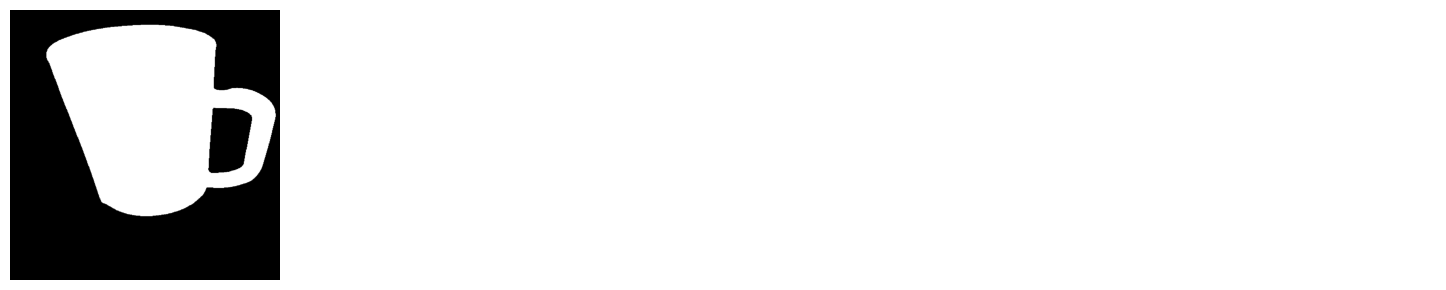

In [7]:
check_loader(val_loader)

Loader Length:  4428
Image Data Shape:  torch.Size([1, 3, 1024, 1024])
Image Data Type: torch.float32
Mask Shape:  torch.Size([1, 3, 1024, 1024])
Mask Data Type: torch.float32
Names:  ['4760.jpg']


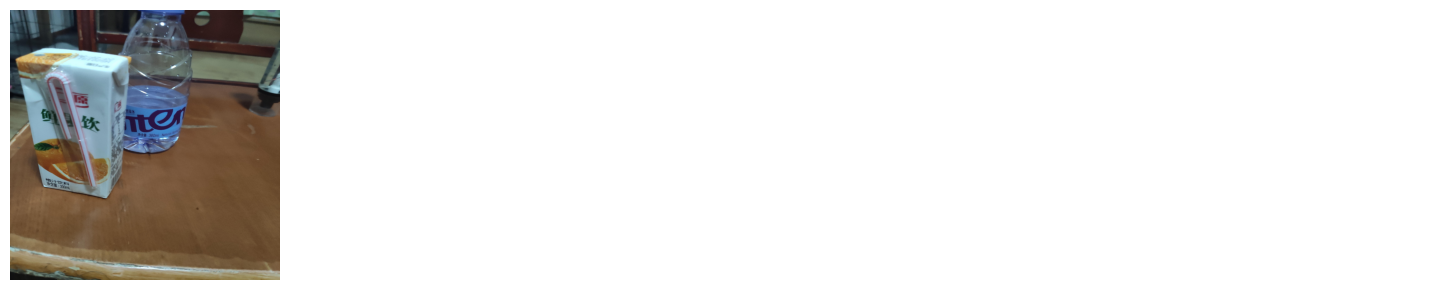

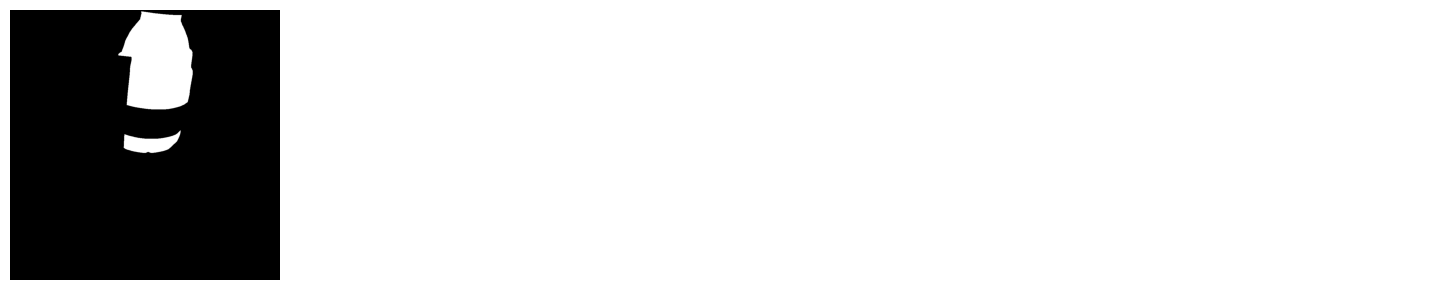

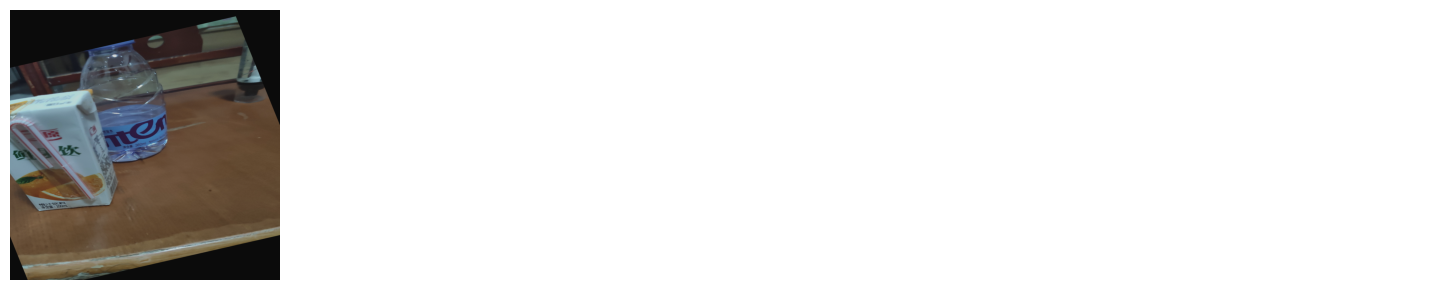

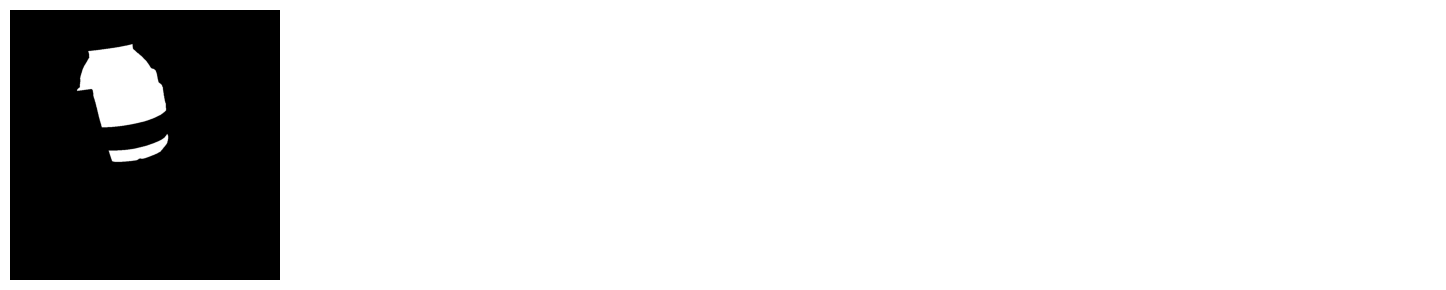

In [8]:
check_loader(test_loader)